In [354]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn as sk 
from  sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression



## Setting

 
<img src="https://i1.sndcdn.com/artworks-000502633698-vxm3q1-t500x500.jpg" alt="Someone study" width="200" height="200">

The dataset contains data on the grade point average (GPA) of students enrolled in a fairly large research university that also supports men’s and women’s athletics at the Division I level.  The number of observations equals 4137 (students). This data set includes the following variables: 

|variables|description|
|---|---|
|Sat | combined SAT score |
|tothrs |  total hours of classes taken through fall semester |
|colgpa|GPA after fall semester |
|athlete|=1 if athlete |
|verbmath|verbal/math SAT score |
|hsize|size graduating class, 100s |
|shrank|rank in graduating class |
|hsperc|high school percentile, from top |
|female|=1 if female |
|white|=1 if white |
|black|=1 if black |
|minority|=1 if nonblack and nonwhite  |

 

  

Scholastic Assessment Test (SAT) is the national standardized test taken by all four-year college-bound students in the United States. 


In [355]:
gpa=pd.read_csv("gpa.csv")
gpa 

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,minority
0,920,43,2.04,1,0.48387,0.10,4,40.000000,1,0,0,1
1,1170,18,4.00,0,0.82813,9.40,191,20.319150,0,1,0,0
2,810,14,1.78,1,0.88372,1.19,42,35.294120,0,1,0,0
3,940,40,2.42,0,0.80769,5.71,252,44.133100,0,1,0,0
4,1180,18,2.61,0,0.73529,2.14,86,40.186920,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4132,990,49,2.24,0,1.02041,2.33,89,38.197430,1,1,0,0
4133,900,50,2.46,0,0.95652,0.10,2,20.000000,1,1,0,0
4134,1340,62,4.00,0,0.94203,0.45,1,2.222222,0,1,0,0
4135,980,12,2.83,0,0.68966,0.35,23,65.714290,1,1,0,0


## Q1. [14 points]

 

Randomly sample 500 students **without replacement** from the original dataset based on `DataFrame.sample()` method. Use `random_state=300`.

Using only the information of these 500 students, test the following hypothesis using $\alpha=0.05$: 

*The average GPA of the students from this university is lower than 3.*

In your answer, provide the following information

1.   Null hypothesis/Alternative hypothesis
2.   Test the hypothesis based on 1000 rounds of simulation using Bootstrapping. 
3.   Visualize the distribution of the sample statistics from simulation, the rejection region(s), and the observed statistics in the same graph.
4.   Provide the conclusion.
 

Null hypothesis: The average GPA of students from this university is greater than or equal to  3. 

Alternative hypothesis: The average GPA of students from this university is lower than 3.

In [356]:
subset = gpa.sample(n=500, replace=False, random_state=300)
samples=subset.colgpa
samples_adj=samples-np.mean(samples)+3
observed_s=np.mean(samples)
def sampling():
    samples_new=np.random.choice(samples_adj, size=500)
    return np.mean(samples_new)
print(observed_s)

2.684540000000001


In [357]:
stats=[sampling() for i in range(1000)]

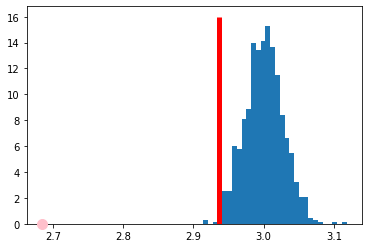

In [358]:
plt.hist(stats,bins=30, density=True)
#alpha=.05
cutoffs=np.percentile(stats, 0.95)
plt.vlines(cutoffs, 0, 16,color="red" ,lw=5 )
plt.scatter(observed_s,0,c="pink",s=100,zorder=300,clip_on=False)
plt.show()

Conclusion: We reject the null hypothesis because the observed statistic falls in the rejection region. There is not enough evidence to accept the null hypothesis that average GPA is greater than or equal to 3, thus we support the alternative hypothesis. 

## Q2. [14 points]

Randomly sample 500 students **without replacement** from the original dataset based on `DataFrame.sample()` method. Use `random_state=300`.

Using only the information of these 500 students, test the following hypothesis using $\alpha=0.05$: 

*There is a difference between the average GPA of athletes and the average GPA non-athletes in this university*

In your answer, provide the following information

1.   Null hypothesis/Alternative hypothesis
2.   Test the hypothesis based on 1000 rounds of simulation based on Bootstrapping. 
3.   Visualize the distribution of the sample statistics from simulation, the rejection region(s), and the observed statistics in the same graph.
4.   Provide the conclusion.

Null hypothesis: There is no difference between the average GPA of athletes and the average GPA of non-athletes in this university. The absolute value of the difference between the average GPA of atheletes and nonathletes is zero. 

Alternative hypothesis: There is a difference between the average GPA of athletes and non-athlete students in this university.The absolute value of difference between the average GPA of atheletes and nonathletes is greater than zero.

In [359]:
subset = gpa.sample(n=500, replace=False, random_state=300)
samples = subset.colgpa
Filter = (subset.athlete == 1)
athletes = subset.loc[Filter]
non_athletes = subset.loc[~Filter]
athletes_adj = athletes.colgpa - np.mean(athletes.colgpa) + np.mean(subset.colgpa)
nonathletes_adj = non_athletes.colgpa - np.mean(non_athletes.colgpa) + np.mean(subset.colgpa)
observed_s = np.mean(non_athletes.colgpa) - np.mean(athletes.colgpa)

In [360]:
def sampling():
    athletes_new = np.random.choice(athletes_adj, size=len(athletes_adj))
    nonathletes_new = np.random.choice(nonathletes_adj, size=len(nonathletes_adj))
    return np.mean(nonathletes_new) - np.mean(athletes_new)

In [361]:
stats=[sampling() for i in range(10000)]

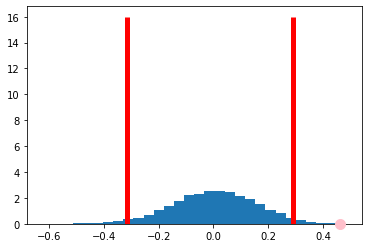

In [362]:
plt.hist(stats,bins=30,density=True)
#alpha=.05
cutoffs=[np.percentile(stats, 97.5), np.percentile(stats, 2.5)]
plt.vlines(cutoffs, 0, 16,color="red" ,lw=5 )
plt.scatter(observed_s,0,c="pink",s=100,zorder=300,clip_on=False)
plt.show()

Conclusion: We reject the null hypothesis because the observed statistic falls into the rejection region. We conclusde there is not enough evidence to support the null hypothesis that there is no difference between GPAs of athletes and non-athletes, and accept the alternative hypothesis. 

## Q3. [6 Points]

For this question, let's use the full dataset again.


* Split the data into three components:

> * First, randomly select 3000 samples from the original dataset as the training set using `train_test_split`. Use random_state=30. Do not shuffle the data. 

> * Next, from the rest of the data, randomly select 500 samples as the validation using `train_test_split`. Use random_state=40. Do not shuffle the data. 

> * The observations that are left will be used as the testing set. 

* Report the average value of `sat` column for  each set of data.


In [363]:
from sklearn.model_selection import train_test_split
import numpy as np

train, data1=train_test_split(gpa, test_size=1137, shuffle=False, random_state=30)
print(np.mean(train.sat))
train

1031.58


,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,minority
0,920,43,2.04,1,0.48387,0.10,4,40.000000,1,0,0,1
1,1170,18,4.00,0,0.82813,9.40,191,20.319150,0,1,0,0
2,810,14,1.78,1,0.88372,1.19,42,35.294120,0,1,0,0
3,940,40,2.42,0,0.80769,5.71,252,44.133100,0,1,0,0
4,1180,18,2.61,0,0.73529,2.14,86,40.186920,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1050,14,2.50,0,0.87500,2.12,35,16.509430,1,1,0,0
2996,1160,79,1.64,0,0.75758,3.11,15,4.823151,0,1,0,0
2997,1290,42,3.04,0,1.08065,3.45,36,10.434780,0,1,0,0
2998,1010,44,1.81,0,0.87037,3.40,115,33.823530,0,1,0,0


In [364]:
validation, test = train_test_split(data1, test_size=637, shuffle=False, random_state=30)
print(np.mean(validation.sat))
validation

1014.76


,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,minority
3000,1030,15,2.80,0,0.74576,3.65,34,9.315068,0,1,0,0
3001,830,55,2.03,0,0.93023,3.35,172,51.343280,0,1,0,0
3002,1170,29,2.48,0,0.88710,3.45,46,13.333330,0,1,0,0
3003,860,50,1.92,0,0.62264,3.45,117,33.913040,0,1,0,0
3004,870,54,3.27,0,0.93333,3.45,28,8.115942,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,910,40,2.35,0,0.82000,4.77,125,26.205450,0,1,0,0
3496,1220,76,2.77,0,0.96774,5.22,13,2.490422,0,1,0,0
3497,1250,86,2.32,0,1.01613,5.22,75,14.367820,0,1,0,0
3498,870,28,2.07,0,0.74000,4.77,116,24.318660,1,0,1,0


In [365]:
print(np.mean(test.sat))
test

1036.6718995290423


,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,minority
3500,1090,42,3.07,0,0.87931,4.77,5,1.048218,0,1,0,0
3501,1110,18,3.22,1,0.94737,5.91,10,1.692047,0,1,0,0
3502,950,38,2.18,0,0.79245,5.84,300,51.369860,0,1,0,0
3503,1050,16,1.68,0,0.69355,4.89,198,40.490800,1,1,0,0
3504,820,15,2.53,0,0.70833,5.51,133,24.137930,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4132,990,49,2.24,0,1.02041,2.33,89,38.197430,1,1,0,0
4133,900,50,2.46,0,0.95652,0.10,2,20.000000,1,1,0,0
4134,1340,62,4.00,0,0.94203,0.45,1,2.222222,0,1,0,0
4135,980,12,2.83,0,0.68966,0.35,23,65.714290,1,1,0,0


## Q4. [16 Points]

Using the 3 datasets you created in Q3, select the best model of the following three for prediction of college GPA.

Model1:
$$colgpa=\beta_0+\beta_1 sat +\epsilon$$

Model 2:
$$colgpa=\beta_0+\beta_1 sat +\beta_2 tothrs +\epsilon$$

Model 3:

$$colgpa=\beta_0+\beta_1 sat +\beta_2 tothrs +\beta_3 verbmath+\epsilon$$



* Train each model on the training set, report RMSE on the validation set for each model. Choose the model that gives the lowest RMSE as the best model. 
* Use the best model to predict the outcome on the testing set. Use scatter plot to present the relationship between the actual outcome (x-axis) and the predicted value (y-axis). In the same graph, add a line plot starting from (0,0) to (4,4). Based on the graph, comment on how well the model predicts the GPA. 
* If a person has tothrs=40, sat=1000,verbmath=0.5, based on the best model, calculate the predicted GPA?

In [373]:
#Model1 
X1 = train.loc[:, ["sat"]]
y1 = train.loc[:, ["colgpa"]]
model1 = LinearRegression().fit(X1,y1)
MSE1 = np.mean((model1.predict(validation.loc[:, ["sat"]]) - validation.loc[:, ["colgpa"]])**2)
MSE1

colgpa    0.405889
dtype: float64

In [375]:
#Model2
X2 = train.loc[:, ["sat","tothrs"]]
y2 = train.loc[:, ["colgpa"]]
model2 = LinearRegression().fit(X2,y2)
MSE2 = np.mean((model2.predict(validation.loc[:, ["sat","tothrs"]]) - validation.loc[:, ["colgpa"]])**2)
MSE2

colgpa    0.393911
dtype: float64

In [376]:
#Model3
X3 = train.loc[:, ["sat","tothrs","verbmath"]]
y3 = train.loc[:, ["colgpa"]]
model3 = LinearRegression().fit(X3,y3)
MSE3 = np.mean((model3.predict(validation.loc[:, ["sat","tothrs","verbmath"]]) - validation.loc[:, ["colgpa"]])**2)
MSE3

colgpa    0.394175
dtype: float64

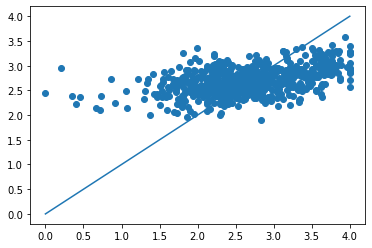

In [392]:
#The 2nd model (model2) has the lowest MSE so it is the best model
y_hat = model2.predict(test.loc[:, ["sat","tothrs"]])
y = test.loc[:, ["colgpa"]]
plt.scatter(y,y_hat,marker="o")
x = [0,1,2,3,4]
plt.plot(x,x)
plt.show()

The model does not do the best job predicting the data (at least at lower levels of y). Even though I am using the "best" model, the scatter plot of the predicted and actual values do not perfectly fall along the line of y=x. This would have indicated that the predicted and actual values are approximately equal, and would have confirmed the accuracy of the model. However, it appears that scatter plot does not follow this trend that well. 

In [401]:
#predicted gpa
print(model2.predict([[1000,40]]))

[[2.57876676]]


## Q5 [10 Points]

Free 10 Points as a reward for your hard work in the past semester. Best luck with your final exams.